In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\anass\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Users\\anass\\Plant_Diseases_Detection\\Training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [22]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.40606996 0.351168   0.4021484 ]
  [0.46032447 0.40647146 0.45430493]
  [0.41602695 0.36504656 0.40426224]
  ...
  [0.6        0.5686275  0.61960787]
  [0.60097814 0.5696056  0.620586  ]
  [0.6021926  0.57082003 0.6218004 ]]

 [[0.38967532 0.33477336 0.38575375]
  [0.47307584 0.41861564 0.46827072]
  [0.4063116  0.3553312  0.3945469 ]
  ...
  [0.6075123  0.5761397  0.62712014]
  [0.60828495 0.5769124  0.6278928 ]
  [0.60889214 0.5775196  0.6285    ]]

 [[0.37647063 0.32156864 0.37278533]
  [0.47788605 0.4229841  0.47396448]
  [0.40446746 0.35327432 0.39312822]
  ...
  [0.611552   0.58017945 0.63115984]
  [0.6117647  0.5803922  0.6313726 ]
  [0.6117647  0.5803922  0.6313726 ]]

 ...

 [[0.49294567 0.43412215 0.46157312]
  [0.49841055 0.439587   0.467038  ]
  [0.49813157 0.43930805 0.46675903]
  ...
  [0.6431373  0.6        0.6156863 ]
  [0.64330274 0.6001655  0.61585176]
  [0.6476496  0.60451233 0.6201986 ]]

 [[0.45025417 0.39143062 0.4188816 ]
  [0.4393244  0.38050088 0.40795186]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [20]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [25]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5729517  0.5494222  0.56510854]
  [0.5692287  0.54569924 0.5613856 ]
  [0.5601458  0.5366164  0.55230266]
  ...
  [0.7690292  0.74942136 0.73765665]
  [0.77141535 0.7518075  0.7400428 ]
  [0.7738016  0.7541938  0.7424291 ]]

 [[0.567702   0.5441726  0.55985886]
  [0.5763873  0.5528579  0.56854415]
  [0.5539417  0.5304123  0.5460986 ]
  ...
  [0.77930075 0.75885737 0.74959916]
  [0.7764373  0.7555167  0.7476902 ]
  [0.7735739  0.752176   0.74578124]]

 [[0.5624524  0.53892297 0.55460924]
  [0.58354586 0.56001645 0.5757027 ]
  [0.5477376  0.5242082  0.53989446]
  ...
  [0.7414317  0.7179023  0.7179023 ]
  [0.729978   0.7064486  0.7064486 ]
  [0.7185243  0.69499487 0.69499487]]

 ...

 [[0.47034964 0.44682023 0.4860359 ]
  [0.46510002 0.44157058 0.4807863 ]
  [0.45985037 0.43632096 0.47553664]
  ...
  [0.72695804 0.7073502  0.7348012 ]
  [0.7359075  0.71629965 0.74375063]
  [0.6136508  0.59404296 0.62149394]]

 [[0.44671726 0.42318785 0.46240354]
  [0.44576278 0.42223337 0.46144906]


In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
##Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 130s 3s/step - loss: 0.9298 - accuracy: 0.4912 - val_loss: 0.8836 - val_accuracy: 0.4688
Epoch 2/20
47/47 [==============================] - 110s 2s/step - loss: 0.7681 - accuracy: 0.6187 - val_loss: 0.6911 - val_accuracy: 0.6667
Epoch 3/20
47/47 [==============================] - 109s 2s/step - loss: 0.5948 - accuracy: 0.7517 - val_loss: 0.5706 - val_accuracy: 0.7344
Epoch 4/20
47/47 [==============================] - 108s 2s/step - loss: 0.4235 - accuracy: 0.8053 - val_loss: 0.3069 - val_accuracy: 0.8750
Epoch 5/20
47/47 [==============================] - 110s 2s/step - loss: 0.2429 - accuracy: 0.9091 - val_loss: 0.2076 - val_accuracy: 0.9167
Epoch 6/20
47/47 [==============================] - 110s 2s/step - loss: 0.2726 - accuracy: 0.8962 - val_loss: 0.2221 - val_accuracy: 0.8854
Epoch 7/20
47/47 [==============================] - 110s 2s/step - loss: 0.2483 - accuracy: 0.8928 - val_loss: 0.2537 - val_accuracy: 0.9010
Epoch 8/20
47

In [15]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 21s 1s/step - loss: 0.0722 - accuracy: 0.9745


In [16]:
scores

[0.07222922146320343, 0.9744779467582703]

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 839ms/step
predicted label: Potato___Late_blight


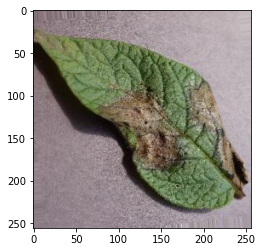

In [28]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 70ms/step


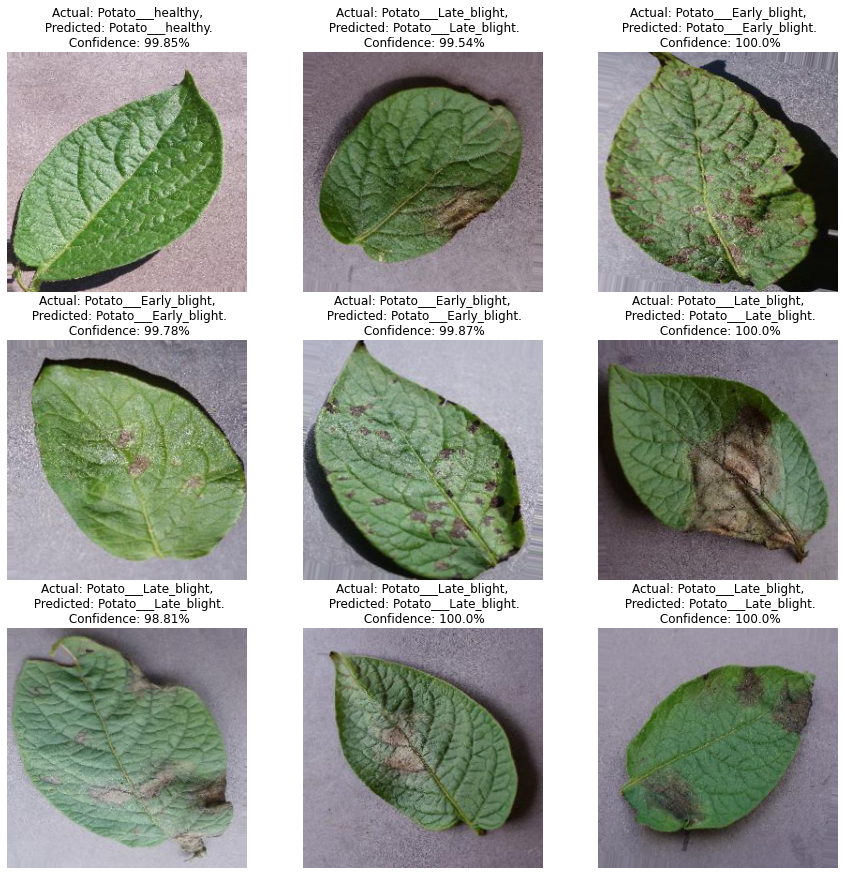

In [30]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [31]:
model.save("../potatoModel.h5")